# Imports

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [58]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [59]:
import cv2
import imghdr

In [60]:
data_dir = '/content/drive/My Drive/bmbs'

In [61]:
os.listdir(data_dir)

['mines', 'grenades']

In [62]:
image_ex = ['jpeg', 'jpg', 'png', 'bmp']

In [63]:
for image_class in os.listdir(data_dir):
  print(image_class)

mines
grenades


In [64]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      ext = imghdr.what(image_path)
      if ext not in image_ex:
        print('Image extension not supported {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue {}'.format(image_path))

In [65]:
#data_dir = "/content/data"
#!mkdir -p "$data_dir"
#!cp -a "/content/drive/My Drive/mines" "$data_dir"
#data = tf.keras.utils.image_dataset_from_directory(
 #   data_dir,
 #   image_size=(224, 224),
 #   batch_size=32
#)
#data

In [66]:
img.shape

(900, 1600, 3)

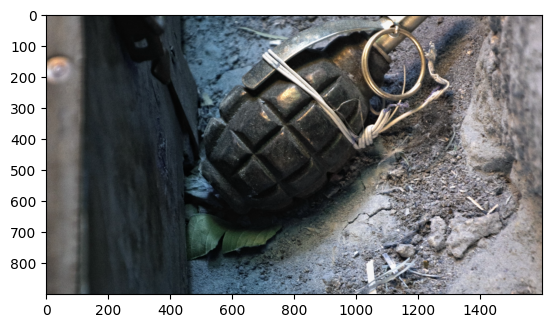

In [67]:
plt.imshow(img)

# Load Dataset

In [68]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [69]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 368 files belonging to 2 classes.


In [70]:
data_iterator = data.as_numpy_iterator()

In [71]:
batch = data_iterator.next()

In [72]:
batch[1]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1], dtype=int32)

In [73]:
#Class 0: grenades
#Class 1: land mines

# Pre-Processing

In [74]:
data = data.map(lambda x,y: (x/255, y))

In [75]:
scaled_iterator = data.as_numpy_iterator()

In [76]:
batch = scaled_iterator.next()

In [77]:
batch[0].max()

1.0

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [79]:
len(data)

12

In [80]:
train_t = int(len(data)*.7) #8
val_t = int(len(data)*.2) #2
test_t = int(len(data)*.1)+1 #2

In [81]:
train = data.take(train_t)
val = data.skip(train_t).take(val_t)
test = data.skip(train_t+val_t).take(test_t)

# Modelling

In [82]:
model = Sequential()

In [83]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [84]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [85]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [86]:
logdir = 'logs'

In [87]:
tensor_call = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [88]:
trained_model = model.fit(train, epochs=12, validation_data=val, callbacks=[tensor_call])

Epoch 1/12
8/8 [==============================] - 23s 2s/step - loss: 0.6812 - accuracy: 0.6094 - val_loss: 0.4313 - val_accuracy: 0.9062
Epoch 2/12
8/8 [==============================] - 22s 2s/step - loss: 0.3603 - accuracy: 0.8789 - val_loss: 0.2381 - val_accuracy: 0.9531
Epoch 3/12
8/8 [==============================] - 22s 3s/step - loss: 0.2470 - accuracy: 0.9141 - val_loss: 0.1460 - val_accuracy: 0.9219
Epoch 4/12
8/8 [==============================] - 21s 2s/step - loss: 0.1268 - accuracy: 0.9531 - val_loss: 0.1017 - val_accuracy: 0.9688
Epoch 5/12
8/8 [==============================] - 20s 2s/step - loss: 0.0867 - accuracy: 0.9648 - val_loss: 0.0223 - val_accuracy: 1.0000
Epoch 6/12
8/8 [==============================] - 19s 2s/step - loss: 0.0411 - accuracy: 0.9883 - val_loss: 0.0451 - val_accuracy: 0.9844
Epoch 7/12
8/8 [==============================] - 21s 2s/step - loss: 0.0262 - accuracy: 1.0000 - val_loss: 0.0455 - val_accuracy: 1.0000
Epoch 8/12
8/8 [==================

In [89]:
trained_model.history

{'loss': [0.681155800819397,
  0.36029231548309326,
  0.24699899554252625,
  0.12681783735752106,
  0.08674630522727966,
  0.04108797758817673,
  0.026167158037424088,
  0.03283888101577759,
  0.009602750651538372,
  0.005876739509403706,
  0.002117116004228592,
  0.0009827879257500172],
 'accuracy': [0.609375,
  0.87890625,
  0.9140625,
  0.953125,
  0.96484375,
  0.98828125,
  1.0,
  0.9921875,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.4312745928764343,
  0.23811474442481995,
  0.14600315690040588,
  0.1016557514667511,
  0.022311054170131683,
  0.045143064111471176,
  0.045454561710357666,
  0.02311241626739502,
  0.004576326347887516,
  0.006105982698500156,
  0.002832166850566864,
  0.001893647713586688],
 'val_accuracy': [0.90625,
  0.953125,
  0.921875,
  0.96875,
  1.0,
  0.984375,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0]}

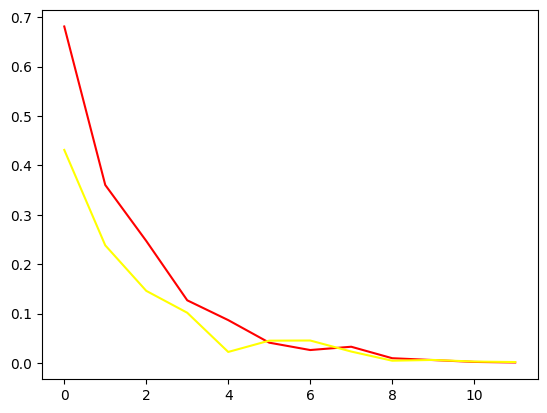

In [90]:
fig = plt.figure()
plt.plot(trained_model.history['loss'], color='red', label='loss')
plt.plot(trained_model.history['val_loss'], color='yellow', label='val_loss')

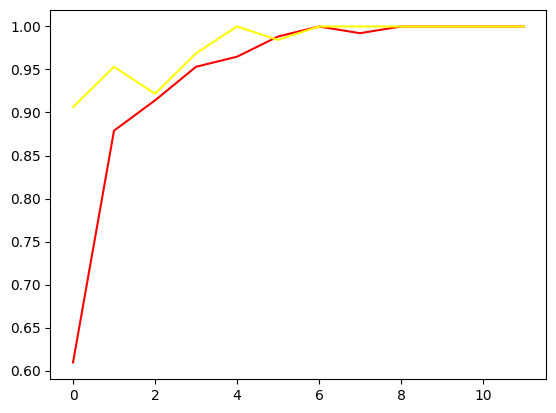

In [91]:
fig = plt.figure()
plt.plot(trained_model.history['accuracy'], color='red', label='accuracy')
plt.plot(trained_model.history['val_accuracy'], color='yellow', label='val_accuracy')

In [92]:
pr = Precision()
re = Recall()
ba = BinaryAccuracy()

In [93]:
for batch in test.as_numpy_iterator():
  X, y = batch
  test = model.predict(X)
  pr.update_state(y, test)
  re.update_state(y, test)
  ba.update_state(y, test)

1/1 [==============================] - 0s 481ms/step


In [94]:
print(f'Precision:{pr.result().numpy()}, Recall:{re.result().numpy()}, Accuracy: {ba.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy: 1.0


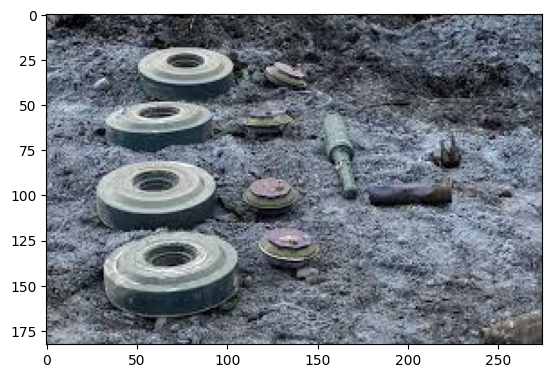

In [95]:
import cv2
input = f'/content/drive/My Drive/example.jpeg'
img = cv2.imread(input)
plt.imshow(img)
plt.show()

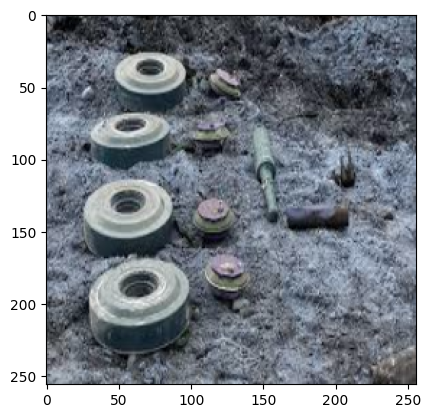

In [96]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [97]:
test = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 36ms/step


In [98]:
if test < 0.5:
  print(f'Detected: Grenade')
else:
  print(f'Detected: Land Mine')

Detected: Land Mine
